Link To Data Set: https://data.wprdc.org/dataset/allegheny-county-walk-scores

Link to Census Tracts: https://pitt.libguides.com/uscensus/alleghenycotracts

Link to Census Tract Data Set: https://data.wprdc.org/dataset/pittsburgh-2014-cdbg-census-tracts/resource/6babf974-85e3-4e2b-af34-3e0c962c54d6


<h1>The Metric: Walkability 

One of the factors we measured for "best neighborhood" is walkability. Walkability is important because not everyone can afford a car or other sorts of transportation. Having a short and convenient walk is nice for those who want to go to the store quickly or get to school fast. I am using a data set from Western Pennsylvania Regional Data Center. This data set uses "Walk Scores." Walk Scores are based on distance, density, traffic, block length, and intersection density. Points are awarded based on these factors with no points being given for walks more than 30 minutes. Having a good walk score correlates with convenient store locations, restaurant locations, and everyday public building locations.

In [1]:
import pandas as pd

data = pd.read_csv("walkScores.csv")

data

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
...,...,...
397,981000,54
398,981100,51
399,981200,75
400,981800,35


These are the walk scores for all the neighborhoods in my data set. The census tract numbers represent the neighborhoods in number form. Later in the code, I will have to convert the census tracts to the actual name of the neighborhoods. 

In [2]:
data = data.sort_values(by='Walk Score', ascending = False).head(20)
data

,Census Tract,Walk Score
1,20100,100
177,445500,97
16,70300,91
14,60300,91
20,70900,89
80,220600,89
55,140800,88
19,70800,88
17,70500,88
15,60500,88


This shows the top 20 neighborhoods in terms of their walkability.

In [3]:
censusTractData = pd.read_csv("censusTracts.csv")
censusTractData

,_id,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,...,dpwdiv,unique_id,sectors,shape_le_1,shape_ar_1,tract,cdbg2014,tracttext,shape_length,shape_area
0,3433,1,0.0,42.0,3.0,40500.0,1.0,4.200304e+11,Block Group 1,G5030,...,3.0,113.0,14.0,11526.863222,7.843108e+06,405.0,Yes,405.0,0.033453,5.009289e-05
1,3434,2,1.0,42.0,3.0,40400.0,1.0,4.200304e+11,Block Group 1,G5030,...,3.0,25.0,14.0,20941.386025,1.390463e+07,404.0,Yes,404.0,0.020358,2.076625e-05
2,3435,3,2.0,42.0,3.0,40200.0,2.0,4.200304e+11,Block Group 2,G5030,...,3.0,21.0,14.0,18271.426385,5.999801e+06,402.0,Yes,402.0,0.059867,5.915794e-05
3,3436,4,3.0,42.0,3.0,30500.0,2.0,4.200303e+11,Block Group 2,G5030,...,3.0,19.0,15.0,15696.759230,7.202139e+06,305.0,Yes,305.0,0.050198,7.104398e-05
4,3437,5,5.0,42.0,3.0,20300.0,1.0,4.200302e+11,Block Group 1,G5030,...,1.0,23.0,13.0,23903.077852,1.694785e+07,203.0,No,203.0,0.077581,1.671798e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3567,140,57.0,42.0,3.0,250700.0,1.0,4.200325e+11,Block Group 1,G5030,...,1.0,25.0,3.0,11711.301248,6.050988e+06,2507.0,Yes,2507.0,0.038391,5.968964e-05
135,3568,141,148.0,42.0,3.0,270400.0,1.0,4.200327e+11,Block Group 1,G5030,...,1.0,81.0,2.0,37157.434470,2.852668e+07,2704.0,Yes,2704.0,0.029147,4.199153e-05
136,3569,142,217.0,42.0,3.0,980800.0,1.0,4.200398e+11,Block Group 1,G5030,...,3.0,19.0,14.0,19242.503109,1.416973e+07,9808.0,No,9808.0,0.052368,4.154919e-05
137,3570,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,0.002660,1.732354e-07


This represents the Census Tracts as well as the name of the neighborhood that correlates with the tract number. 
Next, I will use this data set to manually change the Census Tract numbers on the top 10 neighborhoods in terms of walkability. 

In [4]:
censusTractList = ['Central Business District', 'Sewickley', 'Shadyside', 'Lower Lawrenceville', 'Shadyside', 'Central Northside',
                  'Squirrel Hill South', 'Shadyside', 'Shadyside', 'Polish Hill', 'Bloomfield', 'Bloomfield',
                  'Central Lawrenceville', 'Bloomfield', 'East Liberty', 'Friendship', 'Allegheny Center', 'South Side Flats',
                  'Central Northside', 'Mount Lebanon']
data['Census Tract'] = censusTractList

data_edited = data.drop_duplicates(subset=['Census Tract']).head(10)

data_edited

,Census Tract,Walk Score
1,Central Business District,100
177,Sewickley,97
16,Shadyside,91
14,Lower Lawrenceville,91
80,Central Northside,89
55,Squirrel Hill South,88
15,Polish Hill,88
28,Bloomfield,86
27,Central Lawrenceville,86
39,East Liberty,86


In this code, I first created an array that holds the names of the neighborhoods in order of walkability. I used this to convert the column of "Census Tract" to the array of neighborhood names. I then dropped the duplicate neighborhoods and only showed the top 10. This code drops the same neighborhoods and returns the top 10 neighborhoods in terms of walkability. 

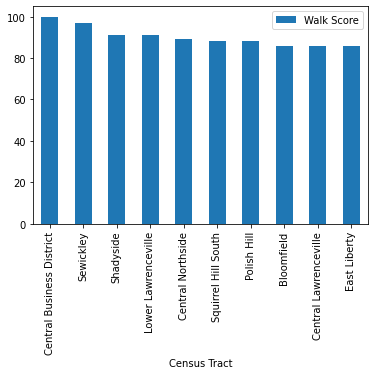

In [5]:
data_edited.plot.bar(x = 'Census Tract', y = 'Walk Score')

This shows a bar graph of the top 10 neigbhorhoods in terms of walkability.

As you can see, all of these neighborhoods have very good walkability. There isn't too much of a difference to say that one is so much greater than the other. 

<h1>Conclusion

To conclude, my graph shows the top ten neighborhoods in terms of walkability. They are all above 80 walk score. It seems that Sewickley and the Central Business District are the best neighborhoods for walkability.